In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats


In [217]:
#De data binnenhalen
train = pd.read_csv('Airlinesatisfaction.csv')

In [218]:
#Random steekproef van 100
import random

# Get a random sample of size 5 from the data
random_subset = train.sample(n=20, random_state=42) 


In [219]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0','id']
random_subset = random_subset.drop(columns=columns_to_drop)

In [220]:
#Check de data even; zorg dat je geen missing values hebt (zit alleen bij Arrival Delay)
random_subset.dropna(subset=['Arrival Delay in Minutes'])

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80638,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,2,5,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
43398,Male,Loyal Customer,22,Business travel,Business,393,3,5,5,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
32751,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
33571,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,2,4,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
71287,Male,disloyal Customer,35,Business travel,Business,1117,2,2,2,1,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied
36275,Female,Loyal Customer,25,Personal Travel,Eco,1199,2,4,2,4,...,2,1,3,4,5,2,2,1,1.0,neutral or dissatisfied
44364,Male,Loyal Customer,34,Personal Travel,Eco,925,3,4,3,1,...,3,4,5,4,4,5,3,1,0.0,neutral or dissatisfied
20292,Male,disloyal Customer,39,Business travel,Eco,546,3,2,3,2,...,4,1,1,2,2,3,4,22,42.0,neutral or dissatisfied
65495,Female,Loyal Customer,45,Personal Travel,Eco,1024,2,4,2,2,...,5,5,2,2,5,5,3,0,0.0,neutral or dissatisfied
2787,Female,Loyal Customer,31,Business travel,Business,1813,2,4,4,4,...,2,3,1,4,1,4,2,0,3.0,neutral or dissatisfied


In [221]:
#Vervang codering voor cijfers
random_subset['Gender'].replace({'Female': 0, 'Male': 1},inplace = True)
random_subset['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)
random_subset['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)
random_subset['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business': 3},inplace = True)


random_subset

C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\715464817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  random_subset['Gender'].replace({'Female': 0, 'Male': 1},inplace = True)
C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\715464817.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ran

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80638,0,1,26,0,1,861,2,4,2,5,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
43398,1,1,22,1,3,393,3,5,5,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
32751,0,1,59,0,1,196,1,3,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
33571,0,1,32,0,1,1020,2,3,2,4,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
71287,1,0,35,1,3,1117,2,2,2,1,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied
36275,0,1,25,0,1,1199,2,4,2,4,...,2,1,3,4,5,2,2,1,1.0,neutral or dissatisfied
44364,1,1,34,0,1,925,3,4,3,1,...,3,4,5,4,4,5,3,1,0.0,neutral or dissatisfied
20292,1,0,39,1,1,546,3,2,3,2,...,4,1,1,2,2,3,4,22,42.0,neutral or dissatisfied
65495,0,1,45,0,1,1024,2,4,2,2,...,5,5,2,2,5,5,3,0,0.0,neutral or dissatisfied
2787,0,1,31,1,3,1813,2,4,4,4,...,2,3,1,4,1,4,2,0,3.0,neutral or dissatisfied


In [222]:
#Eens kijken wat we in de dataset hebben; de variabelen met gemiddelde en de standaardafwijking
averages = random_subset[['Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean()
standarDeviations = random_subset[['Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].std()
print("Averges: ") 
print(averages)
print("Standard Deviations: ")
print(standarDeviations)

Averges: 
Age                                    32.30
Class                                   1.80
Flight Distance                      1062.10
Inflight wifi service                   1.95
Departure/Arrival time convenient       3.20
Ease of Online booking                  2.15
Inflight entertainment                  3.60
On-board service                        3.30
Leg room service                        3.00
Baggage handling                        3.70
Checkin service                         3.25
Inflight service                        3.90
Cleanliness                             3.40
Departure Delay in Minutes              7.80
Arrival Delay in Minutes                7.50
dtype: float64
Standard Deviations: 
Age                                   11.220751
Class                                  1.005249
Flight Distance                      845.666097
Inflight wifi service                  1.234376
Departure/Arrival time convenient      1.472556
Ease of Online booking                

In [223]:
#We gaan het een en ander doen met satisfaction; verstandig om te coderen naar cijfers
random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\1258784526.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\1258784526.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [224]:
#Wat is hier van de bedoeling???
#random_subset['...'].()

In [225]:
#Wat is hier van de bedoeling???
#random_subset[''].()

In [226]:
#Mooiere output
descriptive_stats = rp.summary_cont(random_subset['Age'])

print(descriptive_stats)




  Variable     N  Mean       SD     SE  95% Conf.  Interval
0      Age  20.0  32.3  11.2208  2.509    27.0485   37.5515


c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\summary.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1.name


In [227]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]


In [228]:
rp.summary_cont(random_subset['Flight_Distance'])

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\summary.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Flight_Distance' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1.name


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Flight_Distance,20.0,1062.1,845.6661,189.0967,666.3161,1457.8839


C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\2941144232.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=15)


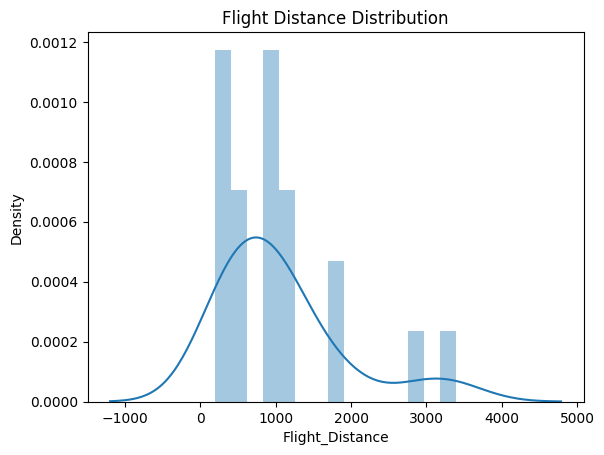

In [229]:
#Visuele checks van de verdelingen
# Extracting the 'Flight Distance' column from the DataFrame
x = random_subset['Flight_Distance']

# Creating a distribution plot using seaborn
sns.distplot(x, bins=15)

# Adding title to the plot
plt.title('Flight Distance Distribution')

# Displaying the plot
plt.show()


C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\4071823577.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 5)


Text(0.5, 1.0, '/Age')

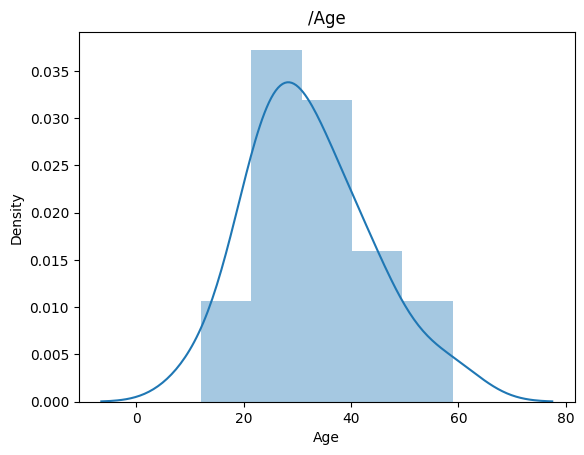

In [230]:
x = random_subset['Age']
sns.distplot(x, bins = 5)
plt.title('/Age')


C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\2432483861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Departure Delay in Minutes')

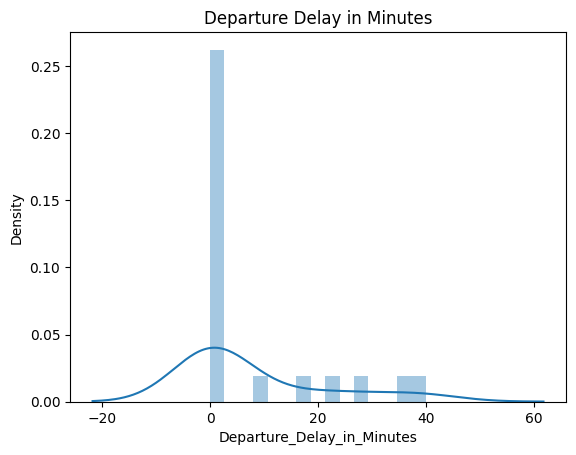

In [231]:
x = random_subset['Departure_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Departure Delay in Minutes')

C:\Users\joeyw\AppData\Local\Temp\ipykernel_21560\403260203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

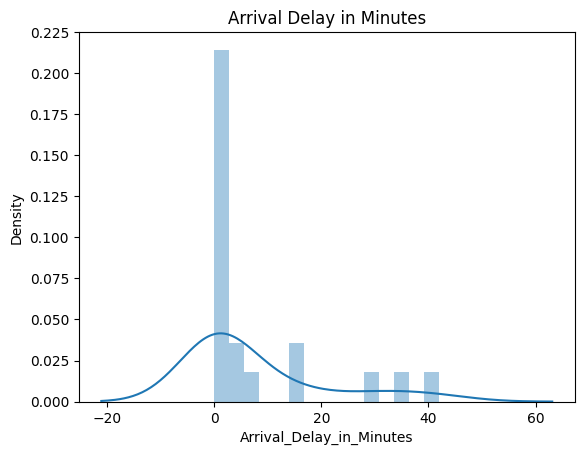

In [232]:
x = random_subset['Arrival_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Arrival Delay in Minutes')

In [233]:
#We willen een toets doen om te bepalen of de data normaal verdeeld is
#Dan moeten we de betrefffende variabele eerst sorteren van laag naar hoog
#Dat blijkt evenwel slechts bij sommige librairies met KS nodig te zijn
#Hierbij toch de code, voor het geval je een andere library gebruikt
#waarbij het wel nodig is
random_subset.sort_values(
    ['Age'],
    ascending=True,
    inplace=True)

In [234]:
#Vervolgens moeten we de data normaliseren (dus omzetten in z -scores)
#Ik maak daar een nieuwe dataset van (df_z)
from sklearn.preprocessing import StandardScaler
#En ik zet eerst alle scores om in cijfers
# random_subset[''].replace({}, inplace = True)
# random_subset[''].replace({'': 0, '': 1}, inplace = True)
# random_subset[''].replace(inplace = True)
# random_subset[''].replace()


In [235]:
#Eindelijk is het zover
print(random_subset[0:5])
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)
print(df_z[0:5])

        Gender  Customer_Type  Age  Type_of_Travel  Class  Flight_Distance  \
101497       0              1   12               0      1             1721   
75710        1              0   20               1      3              333   
43398        1              1   22               1      3              393   
9281         0              1   23               0      1              488   
80740        0              0   24               1      1              402   

        Inflight_wifi_service  Departure/Arrival_time_convenient  \
101497                      1                                  5   
75710                       0                                  0   
43398                       3                                  5   
9281                        2                                  5   
80740                       0                                  3   

        Ease_of_Online_booking  Gate_location  ...  Inflight_entertainment  \
101497                       1              

In [236]:
#Dan een test. Er zijn vele mogelijkheden; we kiezen voor de Kolmogorov Smirnov Test
#Deze voer ik dus uit op de gestandaardiseerde dataset
stats.kstest(df_z['Age'], stats.norm.cdf)


KstestResult(statistic=0.11770779334836162, pvalue=0.9145177506640013, statistic_location=-0.5760455211508229, statistic_sign=1)

In [237]:
stats.kstest(df_z['Flight_Distance'], stats.norm.cdf)


KstestResult(statistic=0.2340431761361168, pvalue=0.19038197890095898, statistic_location=0.16608970954725744, statistic_sign=1)

In [238]:
stats.kstest(df_z['Departure_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.40152884488361007, pvalue=0.002008427473959684, statistic_location=-0.5288027206512523, statistic_sign=1)

In [239]:
stats.kstest(df_z['Arrival_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.31033005413811776, pvalue=0.03294828978033326, statistic_location=-0.28017937221570655, statistic_sign=1)

In [240]:
random_subset.transpose()

,101497,75710,43398,9281,80740,42729,36275,80638,39973,67742,2787,33571,44364,71287,20292,58947,75370,65495,71140,32751
Gender,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
Customer_Type,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,12.0,20.0,22.0,23.0,24.0,25.0,25.0,26.0,30.0,31.0,31.0,32.0,34.0,35.0,39.0,41.0,42.0,45.0,50.0,59.0
Type_of_Travel,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
Class,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0
Flight_Distance,1721.0,333.0,393.0,488.0,402.0,2922.0,1199.0,861.0,936.0,1117.0,1813.0,1020.0,925.0,1117.0,546.0,331.0,507.0,1024.0,3391.0,196.0
Inflight_wifi_service,1.0,0.0,3.0,2.0,0.0,1.0,2.0,2.0,1.0,5.0,2.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0
Departure/Arrival_time_convenient,5.0,0.0,5.0,5.0,3.0,1.0,4.0,4.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0,3.0,3.0
Ease_of_Online_booking,1.0,0.0,5.0,2.0,0.0,1.0,2.0,2.0,1.0,5.0,4.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0
Gate_location,4.0,4.0,5.0,4.0,3.0,1.0,4.0,5.0,4.0,5.0,4.0,4.0,1.0,1.0,2.0,4.0,2.0,2.0,1.0,3.0


<Axes: xlabel='Age', ylabel='Count'>

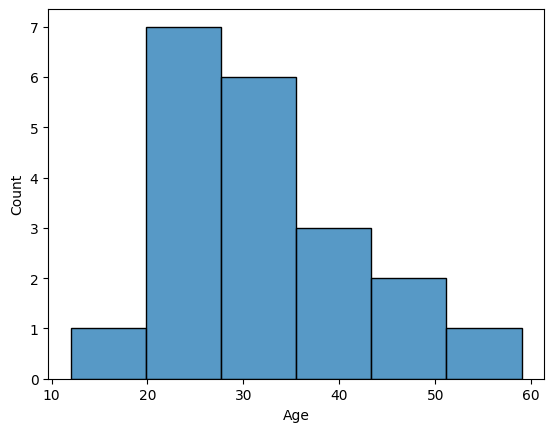

In [241]:
sns.histplot(x=random_subset['Age'])

<Axes: xlabel='Flight_Distance', ylabel='Count'>

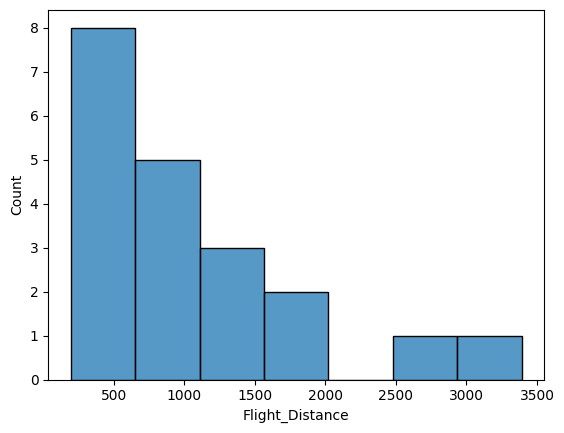

In [242]:
sns.histplot(x=random_subset['Flight_Distance'])

<Axes: xlabel='Departure_Delay_in_Minutes', ylabel='Count'>

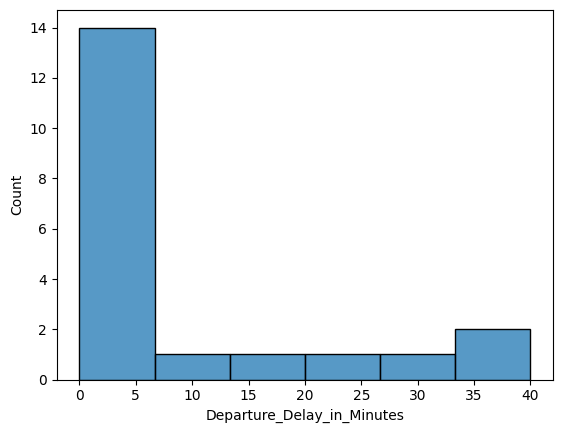

In [243]:
sns.histplot(x=random_subset['Departure_Delay_in_Minutes'])

<Axes: xlabel='Arrival_Delay_in_Minutes', ylabel='Count'>

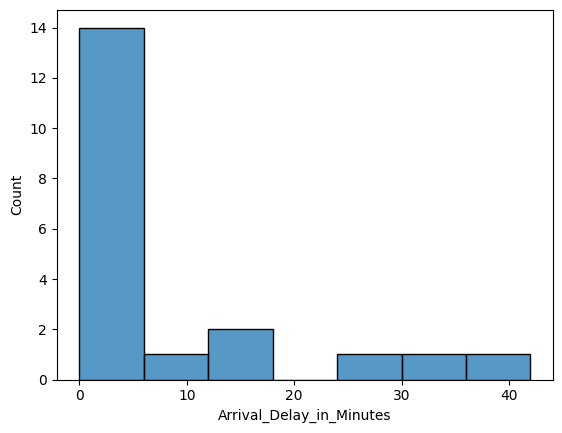

In [244]:
sns.histplot(x=random_subset['Arrival_Delay_in_Minutes'])

In [245]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = random_subset.loc[random_subset['satisfaction'] == 1]
ontevreden = random_subset.loc[random_subset['satisfaction'] == 0]

In [246]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [247]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,20.0,0.40,0.502625,0.0,0.00,0.0,1.00,1.0
Customer_Type,20.0,0.80,0.410391,0.0,1.00,1.0,1.00,1.0
Age,20.0,32.30,11.220751,12.0,24.75,31.0,39.50,59.0
Type_of_Travel,20.0,0.55,0.510418,0.0,0.00,1.0,1.00,1.0
Class,20.0,1.80,1.005249,1.0,1.00,1.0,3.00,3.0
Flight_Distance,20.0,1062.10,845.666097,196.0,466.50,930.5,1137.50,3391.0
Inflight_wifi_service,20.0,1.95,1.234376,0.0,1.00,2.0,2.25,5.0
Departure/Arrival_time_convenient,20.0,3.20,1.472556,0.0,2.00,3.5,4.00,5.0
Ease_of_Online_booking,20.0,2.15,1.460894,0.0,1.00,2.0,3.00,5.0
Gate_location,20.0,3.15,1.424411,1.0,2.00,4.0,4.00,5.0


In [248]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,20.0,0.40,0.502625,0.0,0.00,0.0,1.00,1.0
Customer_Type,20.0,0.80,0.410391,0.0,1.00,1.0,1.00,1.0
Age,20.0,32.30,11.220751,12.0,24.75,31.0,39.50,59.0
Type_of_Travel,20.0,0.55,0.510418,0.0,0.00,1.0,1.00,1.0
Class,20.0,1.80,1.005249,1.0,1.00,1.0,3.00,3.0
Flight_Distance,20.0,1062.10,845.666097,196.0,466.50,930.5,1137.50,3391.0
Inflight_wifi_service,20.0,1.95,1.234376,0.0,1.00,2.0,2.25,5.0
Departure/Arrival_time_convenient,20.0,3.20,1.472556,0.0,2.00,3.5,4.00,5.0
Ease_of_Online_booking,20.0,2.15,1.460894,0.0,1.00,2.0,3.00,5.0
Gate_location,20.0,3.15,1.424411,1.0,2.00,4.0,4.00,5.0


In [249]:
#Correlaties berekenen. Een gemakkelijke waarbij we alle relevante variabelen in een tabel krijgen
random_subset.corr()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Gender,1.000000,-0.357217,-0.097054,0.533396,0.583333,-0.078851,0.288426,-6.115461e-01,0.272375,-0.308757,...,0.092848,-0.244763,-7.404361e-02,-0.162489,0.235702,-0.123091,0.148039,0.147626,0.326808,0.256776
Customer_Type,-0.357217,1.000000,0.128010,-0.452267,-0.102062,0.280618,0.290910,5.051314e-01,0.316033,0.234092,...,0.322192,0.370306,9.068453e-02,0.099504,0.096225,0.326637,0.261892,-0.299396,-0.400256,-0.157243
Age,-0.097054,0.128010,1.000000,0.043191,-0.022397,0.008721,0.145538,-1.312351e-01,0.048482,-0.457395,...,0.389563,0.142531,-9.618502e-02,-0.228365,0.001760,0.122222,0.219570,0.117039,0.147489,0.066137
Type_of_Travel,0.533396,-0.452267,0.043191,1.000000,0.738549,0.144966,0.129481,-5.741993e-01,0.236454,-0.191836,...,-0.045715,-0.375716,-7.291311e-02,-0.170009,0.019342,-0.090909,-0.032395,-0.045331,0.164932,0.663747
Class,0.583333,-0.102062,-0.022397,0.738549,1.000000,0.383383,0.033932,-5.404361e-01,0.200698,-0.161730,...,0.092848,-0.028796,-7.404361e-02,0.142178,0.078567,-0.020515,0.065795,-0.034922,0.008170,0.470757
Flight_Distance,-0.078851,0.280618,0.008721,0.144966,0.383383,1.000000,-0.186396,-9.578825e-02,-0.150525,-0.410291,...,0.108290,0.240437,9.681779e-02,0.329481,0.057414,0.261681,0.032125,-0.184383,-0.236550,0.199456
Inflight_wifi_service,0.288426,0.290910,0.145538,0.129481,0.033932,-0.186396,1.000000,6.370152e-02,0.909156,0.214027,...,0.239442,-0.167085,-1.205991e-01,-0.549986,0.007998,-0.045945,0.281306,-0.349682,-0.154697,-0.056635
Departure/Arrival_time_convenient,-0.611546,0.505131,-0.131235,-0.574199,-0.540436,-0.095788,0.063702,1.000000e+00,0.181045,0.311144,...,-0.248250,0.044229,3.647650e-17,-0.027731,-0.348624,-0.056019,-0.269493,-0.504430,-0.368111,-0.613515
Ease_of_Online_booking,0.272375,0.316033,0.048482,0.236454,0.200698,-0.150525,0.909156,1.810455e-01,1.000000,0.317421,...,0.085185,-0.269972,-3.056990e-01,-0.492661,-0.182462,-0.095287,0.135822,-0.380660,-0.108223,-0.150922
Gate_location,-0.308757,0.234092,-0.457395,-0.191836,-0.161730,-0.410291,0.214027,3.111436e-01,0.317421,1.000000,...,-0.049144,-0.048265,-1.306369e-01,0.032252,-0.214859,-0.170119,0.110280,-0.001120,-0.047569,-0.154788


In [250]:
#Correlatie berekenen
stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])

PearsonRResult(statistic=0.11703906775690948, pvalue=0.6231386741655927)

In [251]:
#Tijd voor meer overzicht
import pingouin as pg

In [252]:
#Correlatie tussen alle variabelen in een tabel
random_subset.iloc[:, 0:25].rcorr()

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Gender,-,,,*,**,,,**,,,...,,,,,,,,,,
Customer_Type,-0.357,-,,*,,,,*,,,...,,,,,,,,,,
Age,-0.097,0.128,-,,,,,,,*,...,,,,,,,,,,
Type_of_Travel,0.533,-0.452,0.043,-,***,,,**,,,...,,,,,,,,,,**
Class,0.583,-0.102,-0.022,0.739,-,,,*,,,...,,,,,,,,,,*
Flight_Distance,-0.079,0.281,0.009,0.145,0.383,-,,,,,...,,,,,,,,,,
Inflight_wifi_service,0.288,0.291,0.146,0.129,0.034,-0.186,-,,***,,...,,,,*,,,,,,
Departure/Arrival_time_convenient,-0.612,0.505,-0.131,-0.574,-0.54,-0.096,0.064,-,,,...,,,,,,,,*,,**
Ease_of_Online_booking,0.272,0.316,0.048,0.236,0.201,-0.151,0.909,0.181,-,,...,,,,*,,,,,,
Gate_location,-0.309,0.234,-0.457,-0.192,-0.162,-0.41,0.214,0.311,0.317,-,...,,,,,,,,,,


In [253]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
random_subset.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


,Gender,Customer_Type,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Gender,-,0.122,0.684,0.741,0.535,0.16
Customer_Type,-0.357,-,0.591,0.231,0.2,0.080
Age,-0.097,0.128,-,0.971,0.623,0.535
Flight_Distance,-0.079,0.281,0.009,-,0.436,0.315
Departure_Delay_in_Minutes,0.148,-0.299,0.117,-0.184,-,0.000
Arrival_Delay_in_Minutes,0.327,-0.4,0.147,-0.237,0.79,-


In [254]:
#Niet omdat het moet, maar omdat het kan 
random_subset.iloc[:, [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].rcorr(stars=False, decimals=3)

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


,Gender,Customer_Type,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
Gender,-,0.122,0.217,0.004,0.245,0.185,0.209,0.150,0.095,0.697,0.298,0.756,0.494,0.317,0.605,0.533
Customer_Type,-0.357,-,0.213,0.023,0.175,0.321,0.384,0.268,0.806,0.166,0.108,0.704,0.676,0.687,0.16,0.265
Inflight_wifi_service,0.288,0.291,-,0.79,0.000,0.365,0.098,0.02,0.177,0.309,0.481,0.613,0.012,0.973,0.847,0.23
Departure/Arrival_time_convenient,-0.612,0.505,0.064,-,0.445,0.182,0.341,0.280,0.082,0.291,0.853,1.,0.908,0.132,0.815,0.251
Ease_of_Online_booking,0.272,0.316,0.909,0.181,-,0.173,0.309,0.069,0.559,0.721,0.25,0.19,0.027,0.441,0.689,0.568
Gate_location,-0.309,0.234,0.214,0.311,0.317,-,0.537,0.249,0.479,0.837,0.84,0.583,0.893,0.363,0.473,0.643
Food_and_drink,0.294,0.206,0.38,-0.225,0.24,0.147,-,0.072,0.018,0.000,0.362,0.463,0.193,0.249,0.258,0.000
Online_boarding,0.334,0.26,0.516,-0.254,0.415,-0.27,0.41,-,0.172,0.16,0.930,0.821,0.161,0.025,0.238,0.348
Seat_comfort,0.384,0.059,0.314,-0.399,0.139,-0.168,0.523,0.318,-,0.014,0.285,0.721,0.175,0.389,0.076,0.025
Inflight_entertainment,0.093,0.322,0.239,-0.248,0.085,-0.049,0.748,0.327,0.541,-,0.053,0.241,0.590,0.388,0.039,0.000


In [255]:
#Een alternatieve methode
#De r en p waardes
random_subset[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].rcorr(stars=False)

c:\Users\joeyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,-,0.971,0.623,0.535
Flight_Distance,0.009,-,0.436,0.315
Departure_Delay_in_Minutes,0.117,-0.184,-,0.000
Arrival_Delay_in_Minutes,0.147,-0.237,0.79,-


In [256]:
#Tijd voor lineaire regressie
#Met gebruik van Pingouin
#Voorspellen van Flight Distance op basis van leeftijd
lm = pg.linear_regression(random_subset['Age'], random_subset['Flight_Distance'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1040.87,605.75,1.72,0.10,0.0,-0.06,-231.77,2313.51
1,Age,0.66,17.76,0.04,0.97,0.0,-0.06,-36.66,37.98


In [257]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,11.31,4.67,2.42,0.03,0.06,0.0,1.50,21.11
1,Flight_Distance,-0.00,0.00,-1.03,0.32,0.06,0.0,-0.01,0.00


In [258]:
#We stoppen ook Departure Delay in het model
lm = pg.linear_regression(random_subset[['Flight_Distance','Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.16,3.39,0.93,0.36,0.63,0.59,-3.98,10.31
1,Flight_Distance,-0.00,0.00,-0.63,0.54,0.63,0.59,-0.01,0.00
2,Departure_Delay_in_Minutes,0.75,0.15,5.16,0.00,0.63,0.59,0.44,1.06


In [259]:
#We voegen ook nog leeftijd toe (ouderen vertragen het boarden .....)
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Age', 'Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.08,6.41,0.17,0.87,0.64,0.57,-12.52,14.68
1,Flight_Distance,-0.00,0.00,-0.62,0.54,0.64,0.57,-0.01,0.00
2,Age,0.07,0.17,0.39,0.70,0.64,0.57,-0.30,0.44
3,Departure_Delay_in_Minutes,0.74,0.15,4.95,0.00,0.64,0.57,0.42,1.06


In [261]:
#Interessante uitkomst; we zien de r2 toenemen als we Departure Delay toevoegen. 
#We zien ook dat Flight Distance niet significant is
#Age toevoegen verandert niets aan ons model en is niet significant
#Dus we doen de regressie vergelijking nog een keer zonder FD en Age
lm = pg.linear_regression(random_subset['Departure_Delay_in_Minutes'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.52,2.11,0.72,0.48,0.62,0.6,-2.92,5.96
1,Departure_Delay_in_Minutes,0.77,0.14,5.46,0.00,0.62,0.6,0.47,1.06


In [262]:
#Een briljante constatering: je voorspelt vertraging bij aankomst heel goed met vertraging bij vertrek :-)
#Voor de liefhebbers: we kunnen het ook met numpy uitvoeren
X = random_subset[['Departure_Delay_in_Minutes']].to_numpy()
y = random_subset['Arrival_Delay_in_Minutes'].to_numpy()
pg.linear_regression(X, y).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.52,2.11,0.72,0.48,0.62,0.6,-2.92,5.96
1,x1,0.77,0.14,5.46,0.00,0.62,0.6,0.47,1.06


In [ ]:
#We weten nu wel de coefficienten, maar niet het belang van de variabelen
#Is wel te herleiden uit t scores en p waarden, maar toch
